# Regions plot

In [6]:
import os

os.sys.path.append('code')
from plotting import SR_x,SR_y1,SR_y2,CR_x,CR_y1,CR_y2,SB_x,SB_y1,SB_y2

from AnalysisUtils import nanoToDf

import matplotlib.pyplot as plt

import uproot
import pandas as pd
import numpy as np


from matplotlib import gridspec

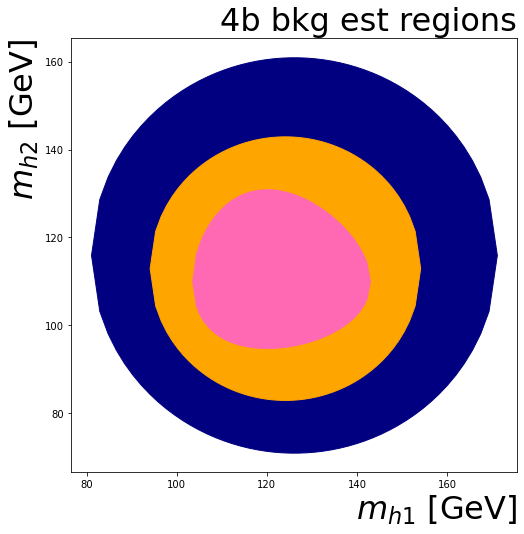

In [23]:
plt.figure(figsize=(8,8))

plt.fill_between(SB_x,SB_y1,SB_y2,color='navy')
plt.fill_between(CR_x,CR_y1,CR_y2,color='orange')
plt.fill_between(SR_x,SR_y1,SR_y2,color='hotpink')

fs = 32
plt.xlabel('$m_{h1}$ [GeV]',fontsize=fs,ha='right',x=1)
plt.ylabel('$m_{h2}$ [GeV]',fontsize=fs,ha='right',y=1)

plt.title('4b bkg est regions',fontsize=fs,loc='right')


plt.savefig('figures/regions.pdf',bbox_inches='tight')


In [13]:
?plt.xlabel

In [3]:
?nanoToDf

In [13]:
mdr = nanoToDf('data/data17_PFlow-FEB20/data_MDR_Dhh_17_NN_100_bootstraps_IQR.root')

sig


In [14]:
for c in mdr.columns:
    print(c)

run_number
event_number
mc_sf
ntag
njets
trigger
kinematic_region
m_hh
pt_hh
X_wt
m_hh_cor
pT_h1
eta_h1
phi_h1
m_h1
dRjj_h1
dPhi_h1
pT_h2
eta_h2
phi_h2
m_h2
dRjj_h2
dPhi_h2
pT_2
pT_4
eta_i
dRjj_1
dRjj_2
cosThetaStar
j0_Db
j1_Db
j2_Db
j3_Db
HT
MDR
MDpT
abs_deta_hh
nValidPairs
NN_d24_weight_bstrap_med_17
NN_d24_weight_bstrap_perc_25_17
NN_d24_weight_bstrap_perc_75_17
NN_d24_weight_bstrap_IQR_17
NN_d24_weight_VRderiv_bstrap_med_17
NN_d24_weight_VRderiv_bstrap_perc_25_17
NN_d24_weight_VRderiv_bstrap_perc_75_17
NN_d24_weight_VRderiv_bstrap_IQR_17


In [37]:
text = "$\mathbf{ATLAS}$ 2017 Data Internal\n"
text += f"2017 triggers FEB20 MNT prod\n"
text += "DL1r 77% WP, MDR+$\min(D_{hh})$"

In [33]:
np.min(mdr.X_wt)

0.0005403609491364268

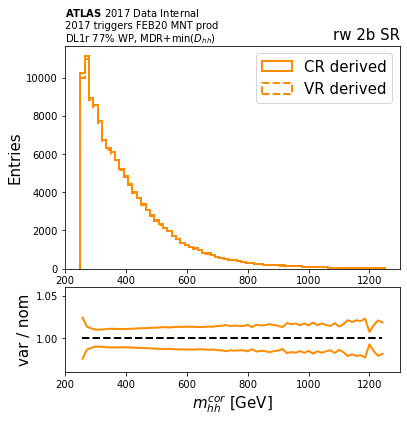

In [53]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(10,1,fig)
ax1 = fig.add_subplot(gs[:7,0])
ax2 = fig.add_subplot(gs[7:,0],sharex=ax1)
gs.update(hspace =1.2)

lw = 2

m = mdr.X_wt > 1.5
nom,e,_ = ax1.hist(mdr.loc[m,'m_hh_cor'],70,(250,1250),color='darkorange',
                   histtype='step',label='CR derived',lw=lw,
                   weights=mdr.loc[m,'NN_d24_weight_bstrap_med_17'])

var,e,_ = ax1.hist(mdr.loc[m,'m_hh_cor'],70,(250,1250),color='darkorange',
                   histtype='step',label='VR derived',ls='--',lw=lw,
                   weights=mdr.loc[m,'NN_d24_weight_VRderiv_bstrap_med_17'])

xx = 0.5 * (e[:-1] + e[1:])
r1 = var / nom 
r2 = 2-r1

ax2.plot(xx,r1,color='darkorange',lw=lw)
ax2.plot(xx,r2,color='darkorange',lw=lw)
ax2.plot(xx,np.ones_like(xx),'k--',lw=lw)

ax2.set_xlabel('$m_{hh}^{cor}$ [GeV]',fontsize=15)
ax1.set_ylabel('Entries',fontsize=15)
ax2.set_ylabel('var / nom',fontsize=15)

ax1.legend(fontsize=15)
ax1.set_title('rw 2b SR',fontsize=15,loc='right')

ax2.set_ylim(0.96,1.06)
ax1.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)

plt.savefig('GraphNN/figures/data16_PFlow-FEB20/m_hh_cor_rw_2b_SR_mdr.pdf',
            bbox_inches='tight')

In [49]:
pag = nanoToDf('data/data17_PFlow-FEB20-5jets/pairAGraph_SM_2b_all_17_NN_100_bootstraps_IQR.root')

sig


In [55]:
short = "$\mathbf{ATLAS}$ 2017 Data Internal\n"
short += f"DL1r 77% WP, FEB20 MNT prod"

Text(0, 1, '$\\mathbf{ATLAS}$ 2017 Data Internal\nDL1r 77% WP, FEB20 MNT prod')

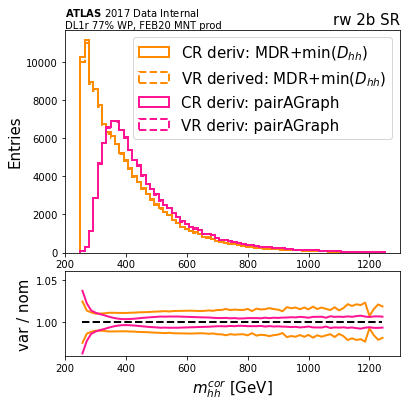

In [60]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(10,1,fig)
ax1 = fig.add_subplot(gs[:7,0])
ax2 = fig.add_subplot(gs[7:,0],sharex=ax1)
gs.update(hspace =1.2)

lw=lw

m = mdr.X_wt > 1.5
nom,e,_ = ax1.hist(mdr.loc[m,'m_hh_cor'],70,(250,1250),color='darkorange',
                   histtype='step',label='CR deriv: MDR+$\min(D_{hh})$',lw=lw,
                   weights=mdr.loc[m,'NN_d24_weight_bstrap_med_17'])

var,e,_ = ax1.hist(mdr.loc[m,'m_hh_cor'],70,(250,1250),color='darkorange',
                   histtype='step',label='VR derived: MDR+$\min(D_{hh})$',ls='--',lw=lw,
                   weights=mdr.loc[m,'NN_d24_weight_VRderiv_bstrap_med_17'])

xx = 0.5 * (e[:-1] + e[1:])
r1 = var / nom 
r2 = 2-r1

ax2.plot(xx,r1,color='darkorange',lw=lw)
ax2.plot(xx,r2,color='darkorange',lw=lw)
ax2.plot(xx,np.ones_like(xx),'k--',lw=lw)


m = pag.X_wt > 1.5
nom,e,_ = ax1.hist(pag.loc[m,'m_hh_cor'],70,(250,1250),color='deeppink',
                   histtype='step',label='CR deriv: pairAGraph',lw=lw,
                   weights=pag.loc[m,'NN_d24_weight_bstrap_med_17'])

var,e,_ = ax1.hist(pag.loc[m,'m_hh_cor'],70,(250,1250),color='deeppink',
                   histtype='step',label='VR deriv: pairAGraph',ls='--',lw=lw,
                   weights=pag.loc[m,'NN_d24_weight_VRderiv_bstrap_med_17'])

r1 = var / nom 
r2 = 2-r1

ax2.plot(xx,r1,color='deeppink',lw=lw)
ax2.plot(xx,r2,color='deeppink',lw=lw)


ax2.set_xlabel('$m_{hh}^{cor}$ [GeV]',fontsize=15)
ax1.set_ylabel('Entries',fontsize=16)
ax2.set_ylabel('var / nom',fontsize=15)

ax1.legend(fontsize=14)
ax1.set_title('rw 2b SR',fontsize=15,loc='right')

ax2.set_ylim(0.96,1.06)
ax1.text(0,1,short,ha='left',va='bottom',transform=ax1.transAxes)

plt.savefig('GraphNN/figures/data16_PFlow-FEB20-5jets//m_hh_cor_rw_2b_SR_mdr.pdf',
            bbox_inches='tight')